In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Load dataset(Iris dataset from UCI)
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

scaler = StandardScaler()
transformer = PowerTransformer()

#Applying different preprocessing techniques
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_transformed = pd.DataFrame(transformer.fit_transform(df), columns=df.columns)
df_pca = pd.DataFrame(PCA(n_components=2).fit_transform(df_scaled), columns=["PC1", "PC2"])
df_trans_norm = pd.DataFrame(scaler.fit_transform(df_transformed), columns=df.columns)
df_trans_norm_pca = pd.DataFrame(PCA(n_components=2).fit_transform(df_trans_norm), columns=["PC1", "PC2"])

#Different preprocessing methods
datasets = {"No Preprocessing": df, "Normalization": df_scaled, "Transformation": df_transformed,
            "PCA": df_pca, "Transformation+Normalization": df_trans_norm,
            "Transformation+Normalization+PCA": df_trans_norm_pca}

#Function to perform clustering and evaluation
def cluster_analysis(X, method="kmeans", n_clusters=3):
    if method == "kmeans":
        model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    elif method == "hierarchical":
        model = AgglomerativeClustering(n_clusters=n_clusters)
    elif method == "meanshift":
        model = MeanShift()
    else:
        raise ValueError("Unknown clustering method")

    labels = model.fit_predict(X)
    silhouette = silhouette_score(X, labels)
    calinski = calinski_harabasz_score(X, labels)
    davies = davies_bouldin_score(X, labels)

    return labels, silhouette, calinski, davies

In [2]:
#Perform clustering
methods = ["kmeans", "hierarchical", "meanshift"]
n_clusters = [3, 4, 5]

results = []
for method in methods:
    for n in n_clusters:
        for preprocessing, dataset in datasets.items():
            labels, sil, cal, dav = cluster_analysis(dataset, method, n)
            results.append([method, preprocessing, n, sil, cal, dav])


results_df = pd.DataFrame(results, columns=["Method", "Preprocessing", "Clusters", "Silhouette", "Calinski-Harabasz", "Davies-Bouldin"])

display(results_df)

,Method,Preprocessing,Clusters,Silhouette,Calinski-Harabasz,Davies-Bouldin
0,kmeans,No Preprocessing,3,0.552819,561.627757,0.661972
1,kmeans,Normalization,3,0.459948,241.904402,0.833595
2,kmeans,Transformation,3,0.457197,246.786556,0.840909
3,kmeans,PCA,3,0.509168,293.856516,0.709931
4,kmeans,Transformation+Normalization,3,0.457197,246.786556,0.840909
5,kmeans,Transformation+Normalization+PCA,3,0.504502,298.160615,0.728837
6,kmeans,No Preprocessing,4,0.498051,530.765808,0.780307
7,kmeans,Normalization,4,0.386941,207.265914,0.869814
8,kmeans,Transformation,4,0.426422,214.499124,0.901770
9,kmeans,PCA,4,0.440893,264.487754,0.754598


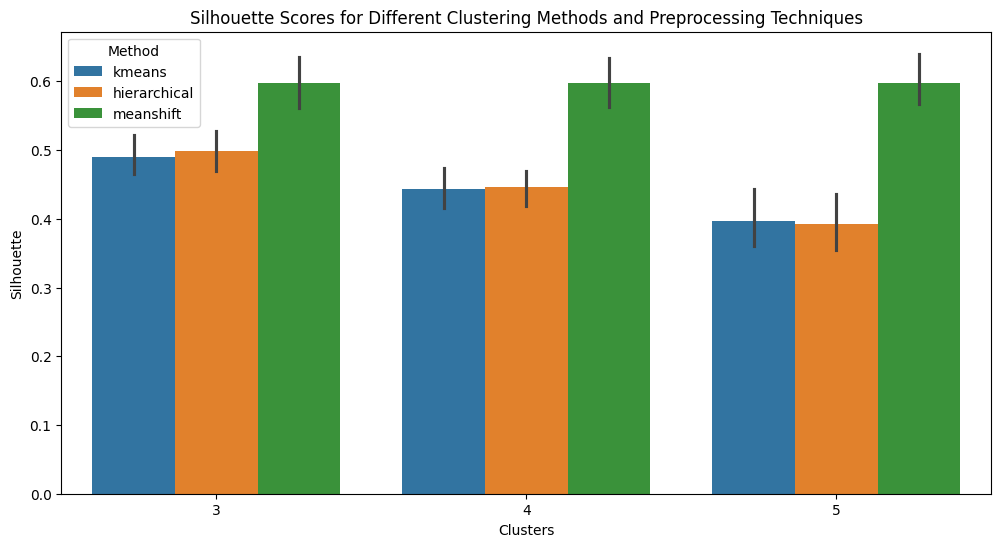

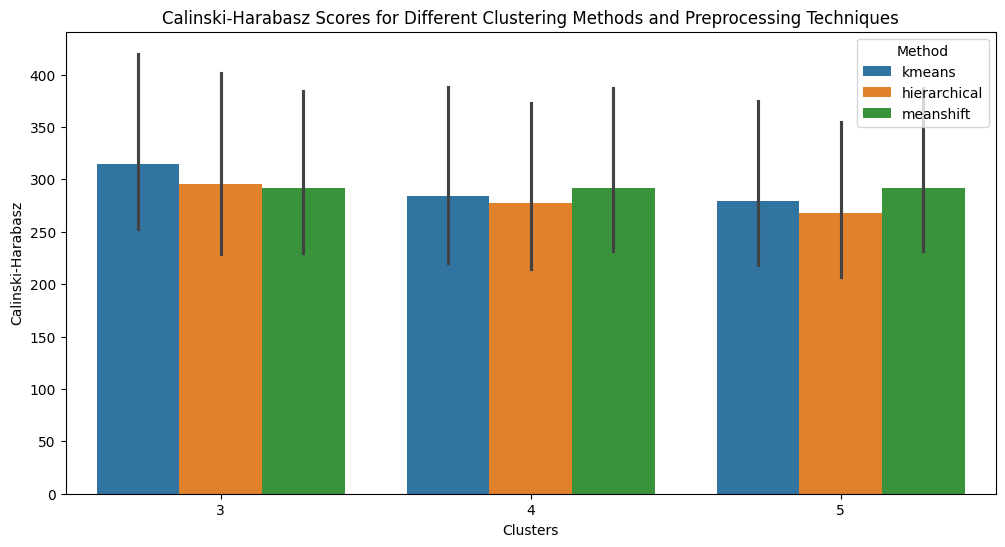

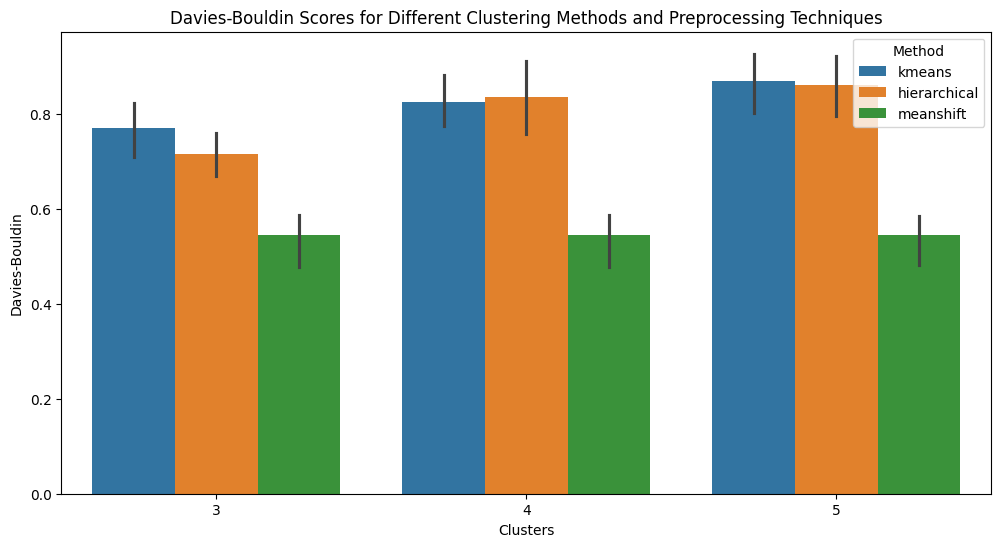

In [3]:
#Plot clustering results
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x="Clusters", y="Silhouette", hue="Method")
plt.title("Silhouette Scores for Different Clustering Methods and Preprocessing Techniques")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x="Clusters", y="Calinski-Harabasz", hue="Method")
plt.title("Calinski-Harabasz Scores for Different Clustering Methods and Preprocessing Techniques")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x="Clusters", y="Davies-Bouldin", hue="Method")
plt.title("Davies-Bouldin Scores for Different Clustering Methods and Preprocessing Techniques")
plt.show()

**Conclusion:**

1. K-Means generally performs well with higher silhouette and Calinski-Harabasz scores.

2. Hierarchical clustering also shows competitive performance, especially with 3 clusters.

3. Mean-Shift clustering adapts to data but may result in varying cluster sizes.

4. The impact of preprocessing varies, with PCA improving interpretability but sometimes reducing clustering performance.
